Let's start by loading up a real dataset on 2019 model-year vehicles, and plotting a histogram just using matplotlib to see the distribution by number of gears.

In [1]:
import warnings

warnings.filterwarnings('ignore')

<Axes: xlabel='# Gears'>

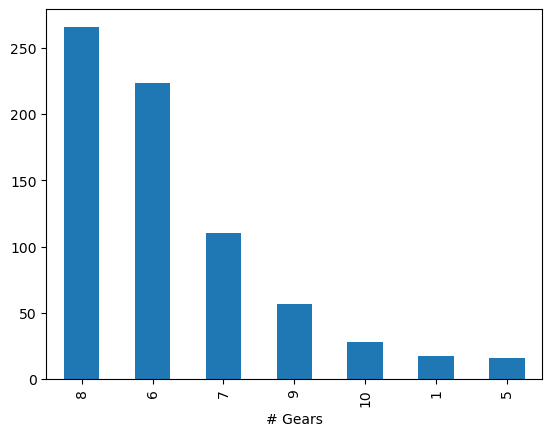

In [2]:
%matplotlib inline
import pandas as pd

df = pd.read_csv("FuelEfficiency.csv")

gear_counts = df['# Gears'].value_counts()

gear_counts.plot(kind='bar')

In [3]:
import seaborn as sns
sns.set()

<Axes: xlabel='# Gears'>

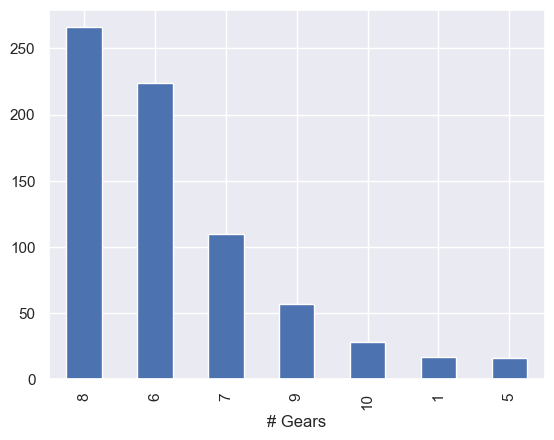

In [4]:
gear_counts.plot(kind='bar')

In [5]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


<Axes: xlabel='CombMPG', ylabel='Density'>

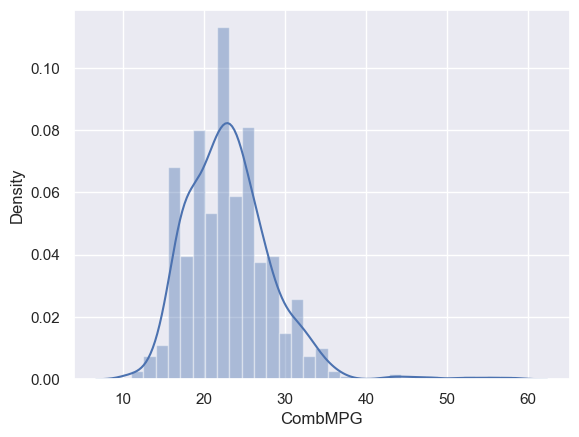

In [6]:
sns.distplot(df['CombMPG'])


Let's classify cars by how many cylinders are in their engines, and look for relationships between cylinders, city MPG rating, Highway MPG rating, and combined MPG rating.

In [7]:
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


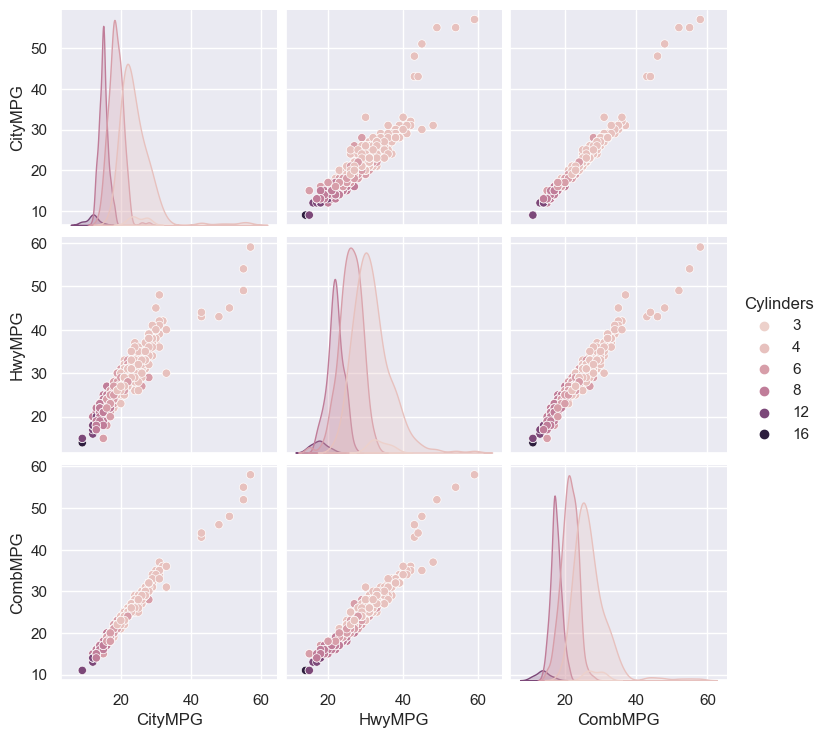

In [8]:
sns.pairplot(df2, hue='Cylinders', height=2.5);

By studying the results above, we can see there is a relationship between number of cylinders and MPG, but MPG for 4-cylinder vehicles ranges really widely. There also appears to be a good linear relationship between the different ways of measuring MPG values, until we get into the higher MPG ratings.

<Axes: xlabel='Eng Displ', ylabel='CombMPG'>

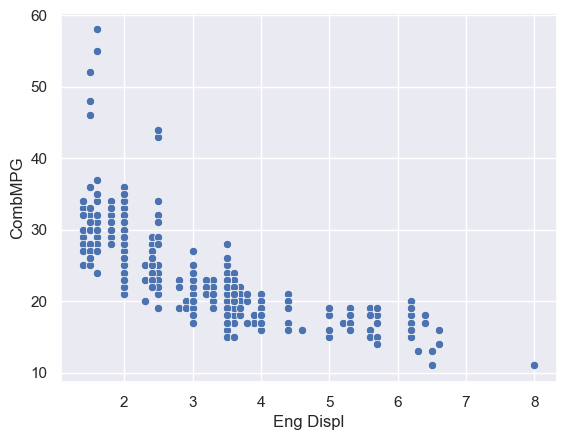

In [9]:
sns.scatterplot(x="Eng Displ", y="CombMPG", data=df)

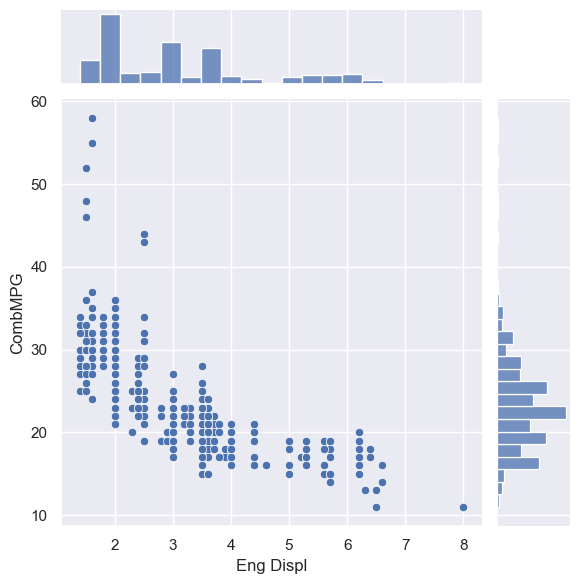

In [10]:
sns.jointplot(x="Eng Displ", y="CombMPG", data=df)

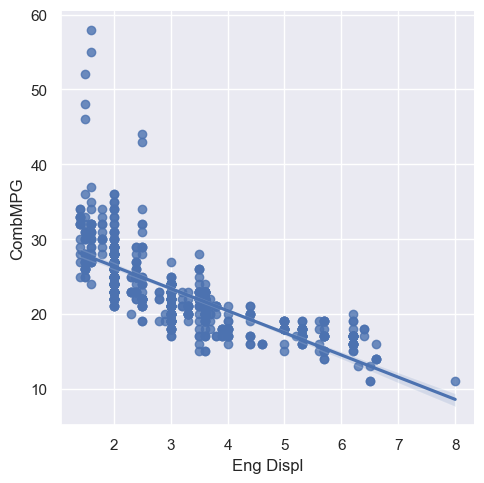

In [11]:
sns.lmplot(x="Eng Displ", y="CombMPG", data=df)



Let's look at box plots for each vehicle manufacturer, visualizing the miles-per-gallon ratings across the vehicles they produce. This lets us look at the spread of MPG ratings across all the vehicles each manufacturer offers.

There are a lot of manufacturers, so to make the resulting graph readable we'll increase Seaborn's default figure size.

[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

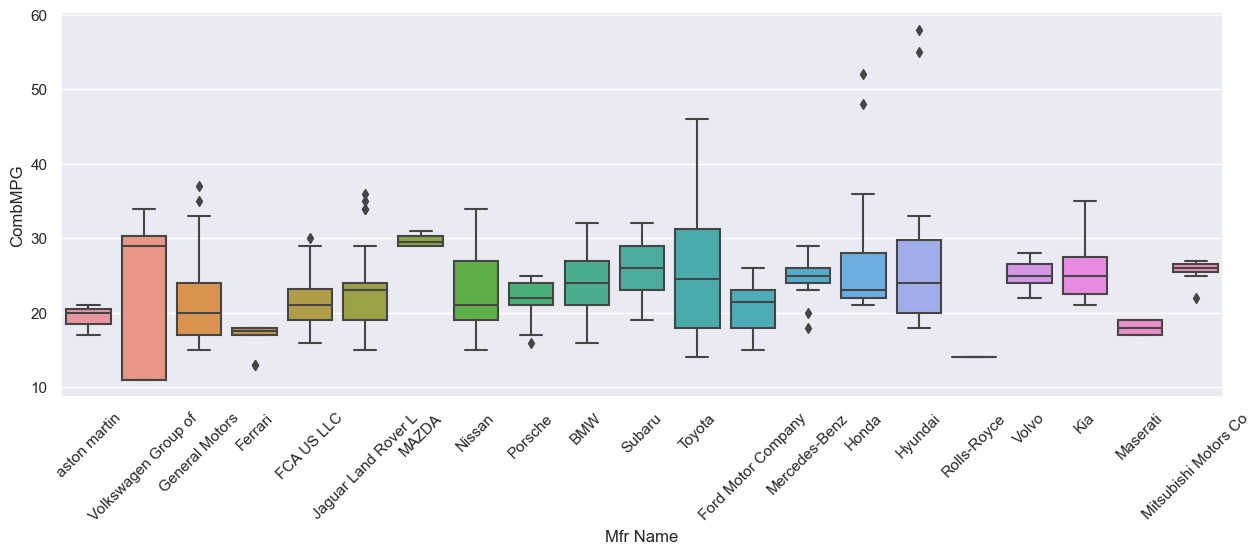

In [12]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

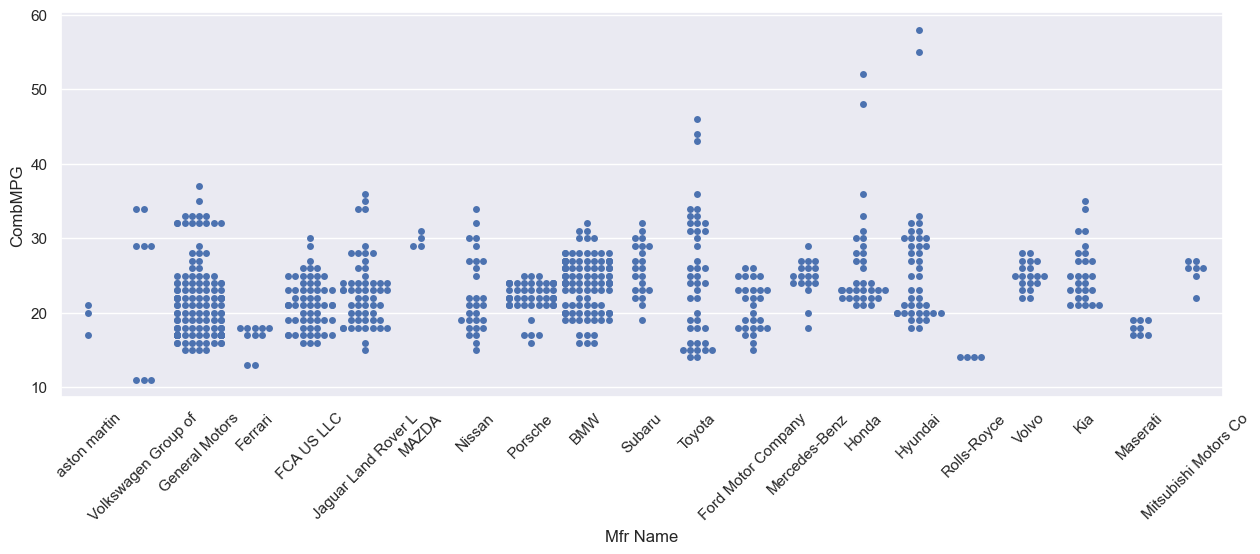

In [13]:
ax=sns.swarmplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

We can see that General Motors offers more vehicle models than anyone else, with BMW not far behind.

[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

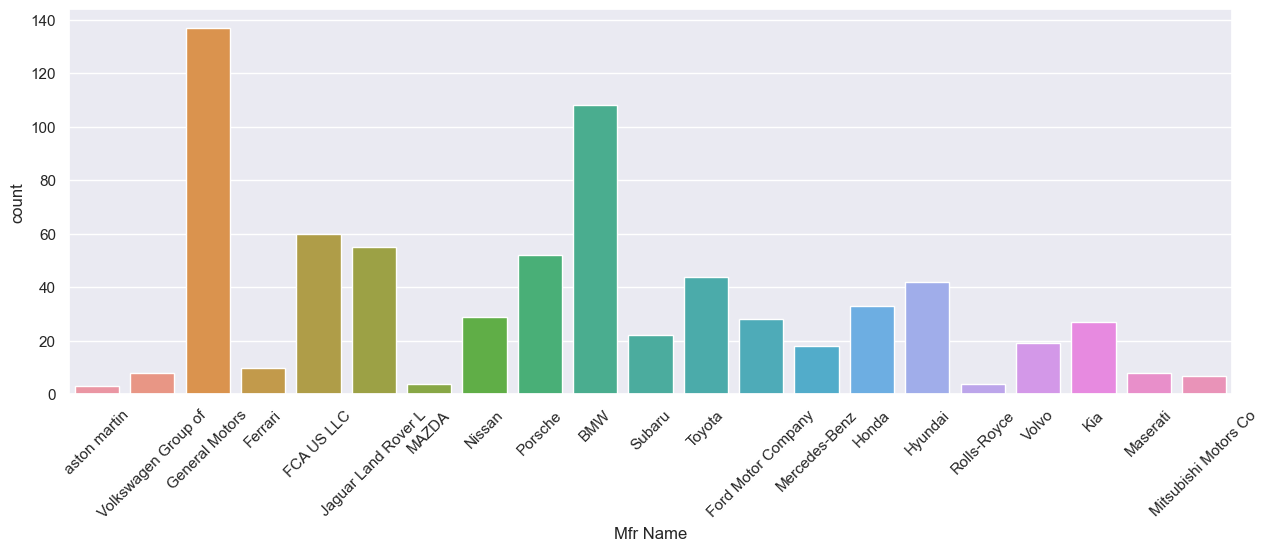

In [14]:
ax=sns.countplot(x='Mfr Name', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


We'll create a pivot table from our original dataframe, to create a 2D table that contains the average MPG ratings for every combination of number of cylinders and engine displacement.

The resulting heatmap shows all of the engine displacement values along the X axis, and all of the cylinder values along the Y axis. For each cell of the table, the actual average MPG rating for that combination of cylinders and engine displacement is represented not as a number, but as a color that ranges from dark for small values, and light for larger values.

And, this does allow you visualize a clear trend where things get progressively darker as we move from the top-left of the graph to the bottom-right. Which makes sense; higher MPG ratings are associated with lower numbers of cylinders, and lower engine displacment values. By the time we get to an 8-liter 16-cylinder engine, the average MPG is at its worst of about 12, represented by the color black.

This particular graph has a lot of missing data. A 3-cylinder 8-liter engine simply does not exist!

<Axes: xlabel='Eng Displ', ylabel='Cylinders'>

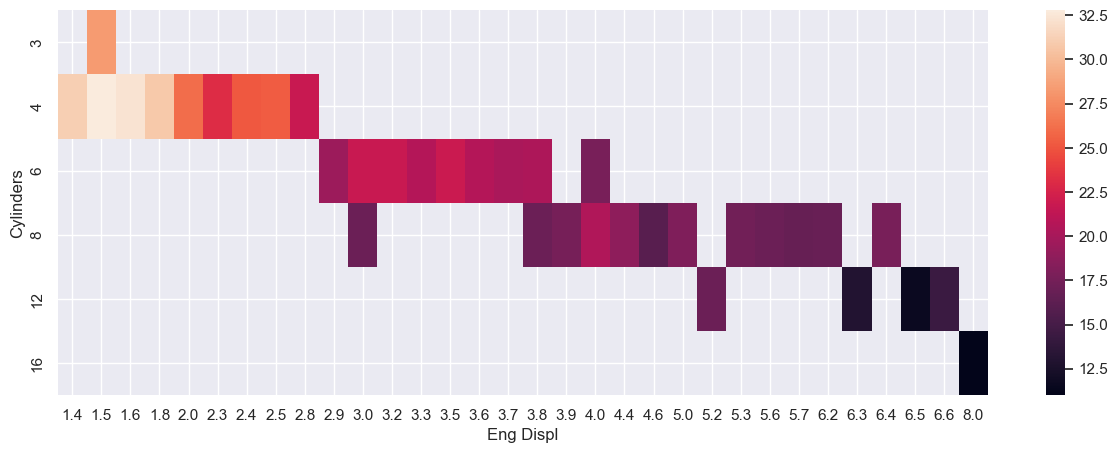

In [15]:
df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
sns.heatmap(df2)


We explore the relationship between the number of gears a car has, and its combined MPG rating. We visualize these two dimensions using a scatter plot, lmplot, jointplot, boxplot, and swarmplot.

In [16]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


<Axes: xlabel='# Gears', ylabel='CombMPG'>

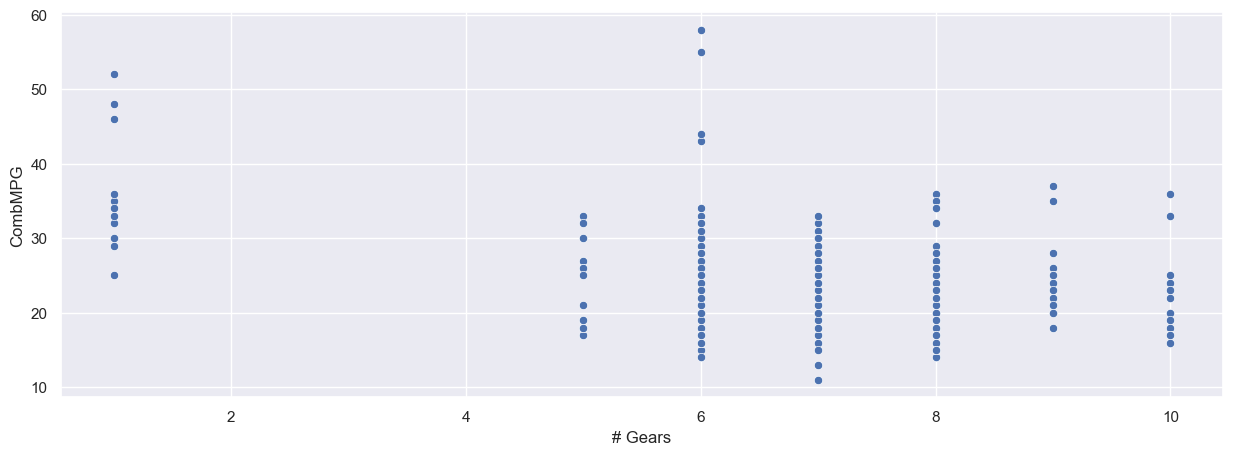

In [17]:
sns.scatterplot(x='# Gears', y="CombMPG", data=df)

A scatterplot arranges itself into columns when you have ordinal data like the number of gears, but it tells us that there's a pretty wide range of MPG values for each type of gear box, although if we look at where the data points are clustered, we can sort of see a downward trend in MPG as the number of gears increases. But it's subtle.

We also see that there's such a thing as a single gear car. These are "continuously variable transmission" cars, and we can see they typically have high MPG ratings and are therefore quite efficient.

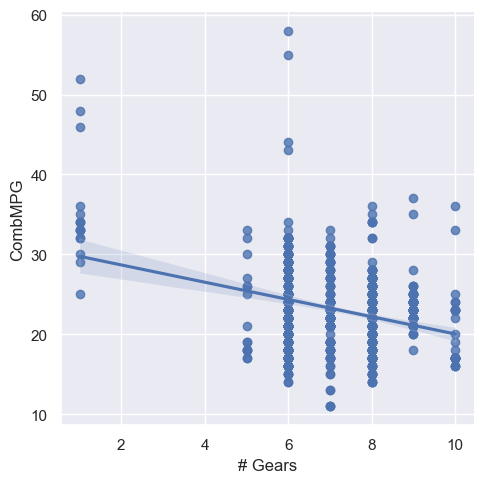

In [18]:
sns.lmplot(x='# Gears', y="CombMPG", data=df);

The "lmplot" gives us a linear regression of our data overlaid on the graph, and this makes the overall trend of lower MPG's with more gears apparent. More gears isn't better when it comes to efficiency, it seems. We also see the error bars on that regression line, which tells us this trend is probably real and not just the result of randomness in the samples.

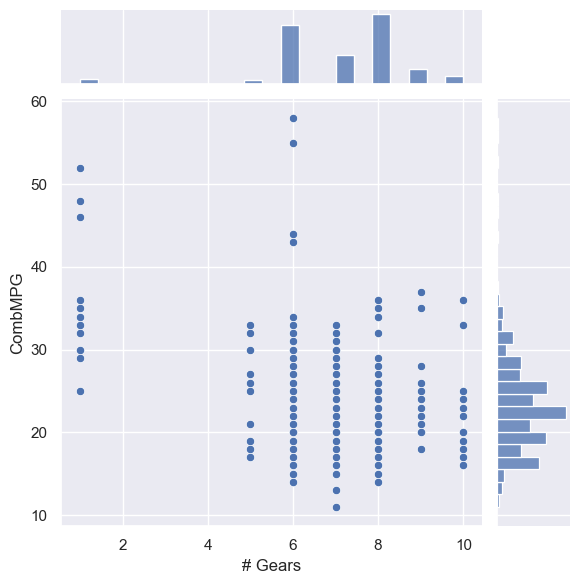

In [19]:
sns.jointplot(x='# Gears', y="CombMPG", data=df)

The jointplot gives us histograms on each axis, which provides some interesting insights. The most common gear configuration seems to be 8, with 6 closely behind. And MPG ratings seem to roughly follow a bell curve centered at around 22 or so.

<Axes: xlabel='# Gears', ylabel='CombMPG'>

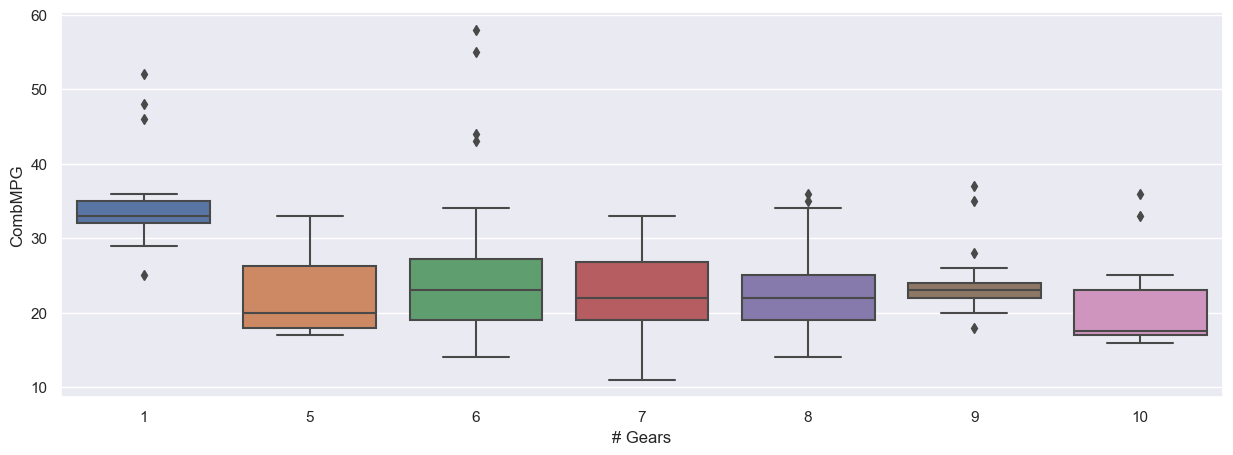

In [20]:
sns.boxplot(x='# Gears', y="CombMPG", data=df)

The box plot shows us that the range of MPG values we see on each gearbox type aren't as crazily distributed as it seemed at first glance; many of the extreme values are in fact outliers that are best discarded when analyzing the trends. This makes the real relationships easier to see; those continuously variable transmissions with a single gear are really quite good at fuel efficiency (higher MPG's are more efficient). Between 5 and 8 things are roughly the same, but from 8-10 things decline markedly.

<Axes: xlabel='# Gears', ylabel='CombMPG'>

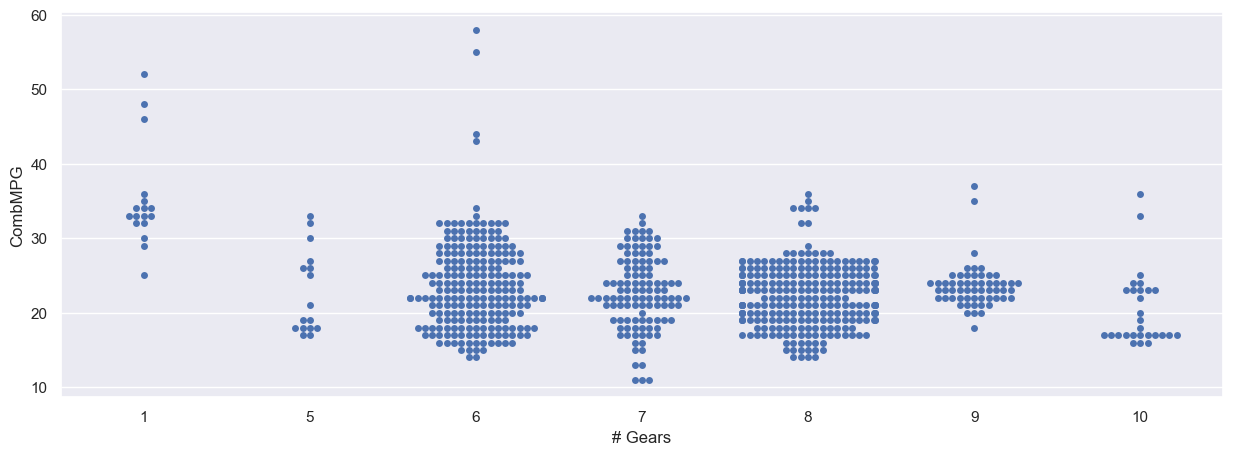

In [21]:
sns.swarmplot(x='# Gears', y="CombMPG", data=df)

The swarm plot makes it even more apparent that those high MPG outliers are in fact outliers on the 6-gear vehicles; the vast majority of 6-gear vehcles have less than 32 MPG. And the overall trend is perhaps easiest to visualize and understand in this representation.

##So, our final verdict: more gears result in worse fuel efficiency. Which strikes me as a little counter-intuitive! But, this is real data from the US Department of Energy for 2019 model year cars, and that's a real conclusion we've drawn.